# TF-IDF using Gensim 

The following notebook will be an exercise in applying methods from the gensim library to the Blog Spot homeless blog corpus.

The aim is to process data that can be used to model a classification system or aid in the statistical analysis of textual information. The model can be applied to predicting the successful exit from homelessness, or evaluating sentiment scores for people on the brink of becoming homeless, depending on the theoretical framework used in examining the corpus.

In [1]:
import pandas as pd
from gensim.parsing.preprocessing import remove_stopwords
from gensim .utils import simple_preprocess

In [2]:
df = pd.read_csv('blog_spot.csv', index_col=0)
df.head()

,wanderingscribe,homelesschroniclesintampa,livinghomelessourwritetospeak,seattlehomeless,homevan,joe-anybody,thehomelessfinch
0,# Extracted from http://wanderingscribe.blogsp...,#IWSG - JANUARY 2019 - CHECK IN - A NEW ME??? ...,Another one\n,# Archived posts\n,HOME VAN NEWSLETTER 6/12/16\n,House Keys Not Handcuffs \n,The Homeless Finch Has Found Her Nest: Project...
1,In case you were wondering... the paperback of...,"Gee,\n",Its been some time since I actually have writt...,# Extracted from https://seattlehomeless.blogs...,HOME VAN NEWSLETTER 1/18/16\n,A (sticker) and a good idea\n,The Homeless Finch Makes It's First Rescue\n
2,"December probably isn't the time for it, but I...","this is a great question, and before I ever wr...",I am presently having a great meal as I write ...,"Ok, it's all relative. Seattle is hot at 80 d...",HOLIDAY ANGELS DISGUISED AS HOMELESS STRANGERS\n,- Portland 2018\n,The Start of Something New for The Homeless Fi...
3,Sometimes I give in to dreams — dream that on...,"play the viola. Then, I came down with essenti...","Back when I last posted, I was running a new b...","So tonight one of our local politicians, Seatt...",HOME VAN NEWSLETTER 11/15/15\n,- WRAP\n,"Jehane Lyle, Watercolor on paper, ""Cuppa"" - de..."
4,"In the meantime though, it's hard graft and sc...",neuro-muscular disorder (my mom was afflicted ...,I actually had myself a big slip and started u...,Here's what he saw: \n,HOME VAN NEWSLETTER 10/4/15\n,On 9/28/15 in Portland Oregon I filmed this in...,This week has been a complete blast. Getting ...


## Data processing and cleaning

The text data is arranged as elements of a dataframe. Since this will be used as training data, we can combine the writings of our sample into one series object to make mapping easier. Standard data processing and cleaning methods are applied.

In [3]:
df1 = df.apply(lambda x: ','.join(x.astype(str)), axis=1)

In [4]:
df2 = df1.apply(lambda x: remove_stopwords(x))

In [5]:
df2

0       # Extracted http://wanderingscribe.blogspot.co...
1       In case wondering... paperback book completly ...
2       December probably isn't time it, I'm looking j...
3       Sometimes I dreams — dream day I'll write book...
4       In meantime though, it's hard graft scouring j...
                              ...                        
2358    I can’t imagine living tent. I can’t imagine c...
2359    suburbs entry level job. I can’t imagine livin...
2360    end sight. ,***WARNING: THIS POST CONTAINS SOM...
2361    But, dang it. I ,Well, ,nan,nan,one wants live...
2362    commute problem. Dental work housing next. ,we...
Length: 2363, dtype: object

In [6]:
df3 = df2.apply(lambda x: simple_preprocess(x, min_len=4))

In [7]:
df3[0] # Remove more stopwords

['extracted',
 'http',
 'wanderingscribe',
 'blogspot',
 'iwsg',
 'january',
 'check',
 'certainly',
 'hope',
 'another',
 'archived',
 'posts',
 'home',
 'newsletter',
 'house',
 'keys',
 'handcuffs',
 'homeless',
 'finch',
 'found',
 'nest',
 'projects',
 'plans',
 'peace']

In [8]:
df4 = df3.to_list()

## Comparing processed data
Below is a comparison of the before and after states of the text. Note that the output in `df4` is now in a bag-of-words (bow) format.

In [9]:
df1.iloc[0]

'# Extracted from http://wanderingscribe.blogspot.com/\n,#IWSG - JANUARY 2019 - CHECK IN - A NEW ME??? I CERTAINLY HOPE SO!\n,Another one\n,# Archived posts\n,HOME VAN NEWSLETTER 6/12/16\n,House Keys Not Handcuffs\xa0\n,The Homeless Finch Has Found Her Nest: Projects, Plans and Peace\n'

In [10]:
documents = df1.to_list()

In [11]:
df4[0]

['extracted',
 'http',
 'wanderingscribe',
 'blogspot',
 'iwsg',
 'january',
 'check',
 'certainly',
 'hope',
 'another',
 'archived',
 'posts',
 'home',
 'newsletter',
 'house',
 'keys',
 'handcuffs',
 'homeless',
 'finch',
 'found',
 'nest',
 'projects',
 'plans',
 'peace']

## Assign unique ID
Now that we have a list of lists representing the dictionary of words found in the sample of writings, our `bow`, we can process the dictionary with the text as key and the frequency count as its value.

In [12]:
from collections import defaultdict

In [13]:
frequency = defaultdict(int)

In [14]:
# Frequency count of df4 to dict
for text in df4:
    for token in text:
        frequency[token] += 1

In [15]:
# 'http' appearing 168 times in our corpus - it needs to be removed!
print(f"The word 'http' appears {frequency['http']} times in the corpus")

The word 'http' appears 168 times in the corpus


In [16]:
# text corpus of words appearing at least n times
processed_corpus = [[token for token in text if frequency[token] > 100] for text in df4]
print(processed_corpus[:2])

[['http', 'check', 'hope', 'home', 'house', 'homeless'], ['book', 'like', 'this', 'sure', 'white', 'time', 'actually', 'post', 'blog', 'time', 'past', 'year', 'home', 'good', 'idea', 'homeless', 'first']]


### Most common words
Using the `collections` module, we can see what the top 10 words by frequency count are. Note that further removal of non-content words from the corpus is necessary. 

In [17]:
from collections import Counter

In [18]:
c = Counter(frequency)

In [19]:
c.most_common(10)

[('homeless', 1971),
 ('people', 1803),
 ('like', 1050),
 ('night', 1048),
 ('time', 934),
 ('nightwatch', 860),
 ('know', 807),
 ('this', 783),
 ('going', 770),
 ('there', 753)]

## Create dictionary keys
Now that we have a list of all the words in the corpus, we can create a dictionary to map any future comparison to. These will be assigned a unique tokenID for every token or word in the corpus. What we'll end up with is a bag-of-words with unique identifiers for our entire corpus. Note the difference between `processed_corpus` and `bow_corpus`, where the former is a untokenized list of context words in our corpus. For this, we will use the built-in `corpora` module from the `gensim` library to make things easy.

In [20]:
from gensim import corpora

In [21]:
# Create (token, tokenID)
dictionary = corpora.Dictionary(processed_corpus)

In [22]:
print(dictionary.token2id)

{'check': 0, 'home': 1, 'homeless': 2, 'hope': 3, 'house': 4, 'http': 5, 'actually': 6, 'blog': 7, 'book': 8, 'first': 9, 'good': 10, 'idea': 11, 'like': 12, 'past': 13, 'post': 14, 'sure': 15, 'this': 16, 'time': 17, 'white': 18, 'year': 19, 'again': 20, 'come': 21, 'feel': 22, 'great': 23, 'hard': 24, 'having': 25, 'knew': 26, 'looking': 27, 'moment': 28, 'month': 29, 'people': 30, 'portland': 31, 'probably': 32, 'seattle': 33, 'shelters': 34, 'something': 35, 'start': 36, 'things': 37, 'turn': 38, 'write': 39, 'anyway': 40, 'back': 41, 'called': 42, 'came': 43, 'city': 44, 'face': 45, 'finally': 46, 'friend': 47, 'happened': 48, 'happy': 49, 'know': 50, 'little': 51, 'local': 52, 'look': 53, 'love': 54, 'maybe': 55, 'myself': 56, 'outside': 57, 'paper': 58, 'some': 59, 'story': 60, 'tell': 61, 'that': 62, 'then': 63, 'think': 64, 'tonight': 65, 'took': 66, 'what': 67, 'with': 68, 'world': 69, 'writing': 70, 'christmas': 71, 'clean': 72, 'getting': 73, 'going': 74, 'here': 75, 'month

In [23]:
# bow representation of the corpus; (tokenID, freq)
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]

In [24]:
print(bow_corpus[50])

[(2, 4), (3, 1), (4, 1), (5, 2), (6, 9), (7, 2), (8, 1), (10, 2), (11, 3), (12, 9), (14, 1), (15, 2), (16, 2), (17, 5), (19, 5), (20, 1), (22, 1), (23, 2), (25, 1), (27, 1), (30, 1), (31, 1), (36, 3), (37, 1), (47, 2), (49, 2), (50, 4), (53, 2), (54, 1), (59, 1), (60, 2), (61, 2), (62, 2), (63, 1), (64, 2), (66, 1), (67, 1), (68, 1), (69, 1), (71, 1), (74, 3), (75, 3), (76, 3), (77, 1), (79, 2), (81, 1), (83, 1), (85, 1), (87, 2), (89, 9), (90, 1), (99, 1), (106, 2), (115, 1), (117, 7), (121, 1), (130, 1), (138, 2), (139, 4), (140, 1), (143, 1), (144, 1), (145, 1), (146, 2), (152, 2), (153, 2), (156, 2), (165, 2), (166, 1), (167, 1), (170, 2), (171, 1), (172, 1), (181, 2), (185, 1), (187, 4), (191, 1), (199, 1), (200, 1), (207, 1), (208, 1), (210, 3), (217, 1), (220, 1), (221, 1), (223, 2), (226, 2), (228, 1), (229, 1), (230, 2), (233, 1), (235, 1), (240, 1), (241, 1)]


### Apply doc2bow to example_doc
Now we can test that our dictionary is able to identify words in an `example_doc` that are found in our `bow_corpus`.

In [25]:
# Modify for testing
example_doc = "it's nice and sunny outside, i'm so happy"

In [26]:
# Output (token, token_freq) in example_doc for words in corpora.Dictionary(processed_corpus)
# Finds words in example_doc that appear within the context of our corpus
example_bow = dictionary.doc2bow(example_doc.lower().split())
example_bow

if len(example_bow) == 0:
    print("No context word found.")
else:
    print(f"Words: {[dictionary[tokenID] for tokenID, freq in example_bow]}")

Words: ['happy', 'nice']


In [27]:
dictionary[5]

'http'

In [28]:
bow_corpus[0]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]

In [29]:
processed_corpus[0]

['http', 'check', 'hope', 'home', 'house', 'homeless']

# Model

## TF-IDF weight
In order to standardize and quantify our calculations, we'll create a `tf-idf` model using the bow_corpus as our baseline or training data. We'll then transform `example_doc2` into a bag-of-words, using only words that are present in our training corpus (i.e. bow_corpus). This way, we will be able to determine which words in our `sample` also appear in our training model. This is measured by it's tf-idf weight and helps answer the question: "How often to words appear in a document and across documents". Later we will use a different algorithm (LSI) to calculate similarity between and across documents.

In [30]:
from gensim import models

In [31]:
# Initialize tf-idf model using bow_corpus
tfidf = models.TfidfModel(bow_corpus)

In [32]:
example_doc2 = df['thehomelessfinch'].to_string()
sample = example_doc2.lower().split() # doc2bow needs list as input

In [33]:
# Transform bow representation into tf-idf weight of words in sample that is found in dictionary
#print(tfidf[dictionary.doc2bow(sample)])

### Comparing with manual document
We can test how well the model is able to determine an input's similiarity, in terms of term frequency weights, by feeding it some text manually and seeing how it compares to the transformed corpus.

In [34]:
# Test string
s = "the new tesla owner is homeless"

# transform the string and calculate tf-idf weight; 
unrelated_doc = s.lower().split()
print(tfidf[dictionary.doc2bow(unrelated_doc)]) # tf-df of unrelated_doc

[(2, 1.0)]


### Example output:

In [35]:
sample = tfidf[dictionary.doc2bow(unrelated_doc)]

In [36]:
dictionary[sample[0][0]]

'homeless'

In [37]:
print(f"Key:{sample[0][0]} -> {dictionary[sample[0][0]]}, tf-idf : {sample[0][1]} ")

Key:2 -> homeless, tf-idf : 1.0 


## Latent Semantic Indexing
Use the tf-idf vector space to train LSI model (chain) with the bow_corpus

### Save model to disk

import os
import tempfile

with tempfile.NamedTemporaryFile(prefix='model-', suffix='.lsi', delete=False) as tmp:
    lsi_model.save(tmp.name)  # same for tfidf, lda, ...

loaded_lsi_model = models.LsiModel.load(tmp.name)

os.unlink(tmp.name)

print(lsi_model.print_topics(5))

### Applying LSI to test document
Similarity queries; Sample unknown dataset related to topic

### Import reddit_titles
with open("./titles.txt", "r") as f:
    data = f.read().splitlines()

data[:2]

In [38]:
from nltk.corpus import stopwords
from gensim import similarities

In [39]:
corpus_tfidf = tfidf[bow_corpus] # bow_corpus as vector of tf-idf weights
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=300)
corpus_lsi = lsi_model[corpus_tfidf]

In [40]:
index = similarities.MatrixSimilarity(lsi_model[corpus_tfidf]) # tf-idf weights of dictionary

In [41]:
texts = dictionary.doc2bow(example_doc.lower().split())

In [42]:
test_lsi = lsi_model[texts]

In [43]:
test_lsi[:10]

[(0, -0.10509210152281052),
 (1, -0.05085003660272699),
 (2, 0.12532529633403383),
 (3, -0.01791179103473233),
 (4, -0.00653883487169981),
 (5, 0.05789115423783059),
 (6, 0.011011234580699058),
 (7, 0.05897957216309417),
 (8, 0.08614047317735876),
 (9, 0.020643023530074772)]

In [44]:
sims = index[test_lsi]

In [45]:
doc_sp = []
sims = sorted(enumerate(sims), key=lambda item: -item[1])
for doc_position, doc_score in sims:
    doc_sp.append([doc_score, documents[doc_position]]) # documents = list of sentences; documents[doc_position]

In [46]:
(sims[:5])

[(2318, 0.46930686),
 (1763, 0.44944912),
 (1271, 0.41857812),
 (1369, 0.41189283),
 (1483, 0.40646735)]

## Word2Vec

In [47]:
from gensim.models import Word2Vec

In [48]:
model = Word2Vec(sentences=processed_corpus, window=5, min_count=10, workers=4) # Omit: vector_size=100

In [49]:
model.train(['hello','world'], total_examples=1, epochs=1)

(0, 10)

In [50]:
vector = model.wv['homeless']

In [51]:
(vector)

array([ 0.01207975,  0.15678528, -0.01333298, -0.14175318,  0.24194886,
        0.1973234 , -0.06611144, -0.07212614,  0.080629  , -0.14186499,
        0.19599146, -0.00345907,  0.01379137,  0.2330907 ,  0.11173357,
       -0.04637161, -0.13388288,  0.5622778 , -0.2509712 ,  0.1774273 ,
       -0.23380616, -0.24027503,  0.40855503,  0.22220066,  0.08276968,
        0.0089727 ,  0.2056346 ,  0.36359766, -0.01320653, -0.22540751,
       -0.08634856,  0.28837553,  0.02367245, -0.3284909 , -0.20097327,
       -0.3066016 , -0.05030617,  0.10018826, -0.16276994,  0.05899394,
       -0.04926734,  0.01494651,  0.14072584, -0.01114619, -0.1098242 ,
       -0.27371976,  0.02946266, -0.2585209 ,  0.20567095, -0.16715775,
        0.43361402, -0.30341572,  0.02055938, -0.08646188,  0.00920071,
       -0.24842347,  0.05168438,  0.15232514, -0.24845041,  0.0020596 ,
       -0.01439241,  0.22450756,  0.07935625,  0.21543261,  0.10135927,
       -0.15758279,  0.25097996,  0.1668279 , -0.08986812,  0.37

In [52]:
print(model.wv.vocab['homeless'])

Vocab(count:1971, index:0, sample_int:919137921)


In [53]:
from gensim.models import KeyedVectors

In [54]:
word_vectors = model.wv

In [55]:
wv2 = KeyedVectors.load('word2vec.model', mmap='r')

In [56]:
vector2 = wv2.__getitem__(['homeless'])

<ipython-input-56-0d7ebca678b0>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vector2 = wv2.__getitem__(['homeless'])


In [57]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [58]:
sample_tf = []
for ID, tf in sims:
    sample_tf.append(tf)

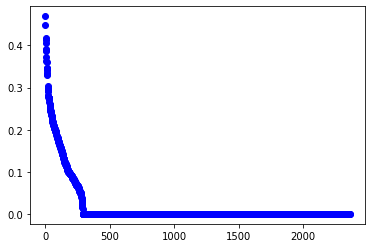

In [59]:
plt.plot(sample_tf, 'ob')

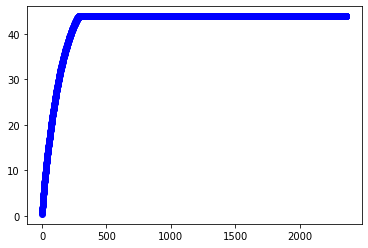

In [60]:
plt.plot(np.cumsum(sample_tf), 'ob')

In [61]:
cos_sim = [item for item in sims]
#print(cos_sim)

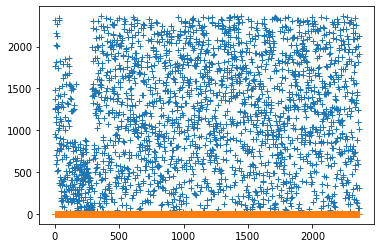

In [62]:
plt.plot(cos_sim, '+') # Does not mean anything? Clusters; K-nearest neighbor?
plt.show()

In [63]:
c.most_common_list = c.most_common(10)

In [64]:
c.most_common_list[0]

('homeless', 1971)

In [65]:
type(c.most_common_list[0])

tuple

In [66]:
x = ([[word] for word, count in c.most_common_list])
y = ([[count] for word, count in c.most_common_list])